**Ahmad Naufal Luthfan Marzuqi - 202210370311072 - DIP B**

**Tujuan**

Melakukan eksplorasi awal, penyeimbangan data, dan pembagian dataset untuk meningkatkan akurasi model prediksi terhadap dataset yang tidak seimbang.

**Eksplorasi awal dan pra-pemrosesan**



*   Distribusi awal kelas target, Analisis menunjukkan ketidakseimbangan pada kelas target smoke.

*   Pra-pemrosesan, Missing values dalam dataset telah ditangani, termasuk imputasi nilai rata-rata untuk kolom numerik. Fitur numerik seperti bwt, gestation, age, height, dan weight telah dinormalisasi menggunakan Min-Max Scaling.



Distribusi Kelas Target Sebelum Balancing:
smoke
0.0    742
1.0    484
Name: count, dtype: int64


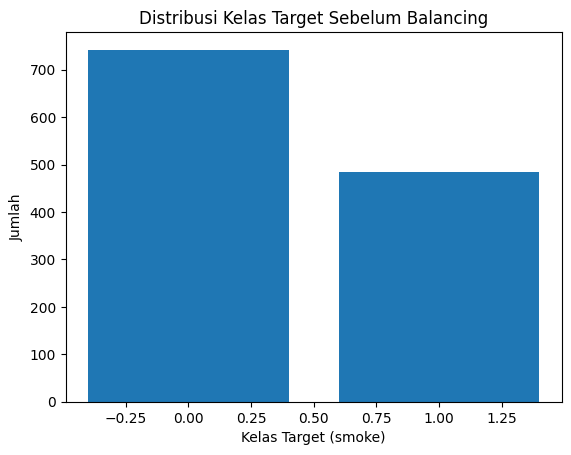

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset
df = pd.read_csv("babies.csv")

# Analisis distribusi kelas
class_distribution = df['smoke'].value_counts()
print("Distribusi Kelas Target Sebelum Balancing:")
print(class_distribution)

# Visualisasi distribusi kelas
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel("Kelas Target (smoke)")
plt.ylabel("Jumlah")
plt.title("Distribusi Kelas Target Sebelum Balancing")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Pra-pemrosesan fitur numerik
numerical_features = ['bwt', 'gestation', 'age', 'height', 'weight']
scaler = MinMaxScaler()

# Mengatasi missing values sebelum normalisasi
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

# Normalisasi menggunakan Min-Max Scaler
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df[numerical_features].head())

        bwt  gestation       age    height    weight
0  0.537190   0.663415  0.400000  0.473684  0.079755
1  0.479339   0.653659  0.600000  0.578947  0.294479
2  0.603306   0.639024  0.433333  0.578947  0.171779
3  0.561983   0.640676  0.700000  0.842105  0.631902
4  0.438017   0.653659  0.266667  0.736842  0.233129


In [6]:
# Menangani nilai NaN pada kolom target (smoke)
df = df[df['smoke'].notna()]  # Menghapus baris dengan NaN pada kolom target

# Menangani nilai NaN pada fitur
df.fillna(df.mean(), inplace=True)  # Mengisi nilai NaN dengan rata-rata kolom

<ipython-input-6-acc4a6e1fe45>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)  # Mengisi nilai NaN dengan rata-rata kolom


**Data Balancing**

Data seimbang menggunakan SMOTE (Synthetic Minority Oversampling Technique). Distribusi kelas target setelah balancing menunjukkan jumlah yang sama pada kedua kelas.

Distribusi Sebelum Balancing: Counter({0.0: 742, 1.0: 484})
Distribusi Setelah Balancing: Counter({0.0: 742, 1.0: 742})


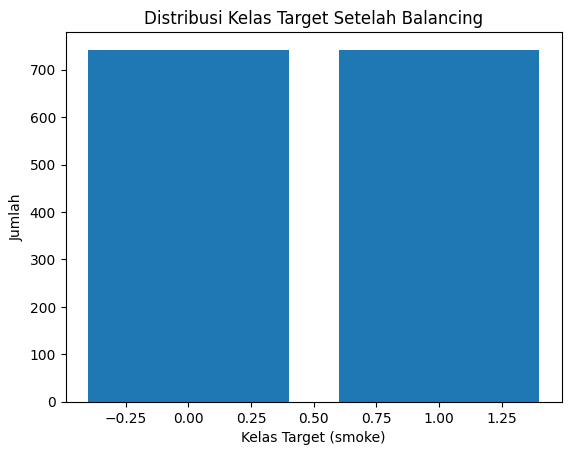

In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Memisahkan fitur dan target
X = df.drop(columns=['smoke', 'case'])  # Menghapus kolom 'case' jika tidak diperlukan
y = df['smoke']

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Distribusi sebelum dan sesudah balancing
print("Distribusi Sebelum Balancing:", Counter(y))
print("Distribusi Setelah Balancing:", Counter(y_res))

# Visualisasi distribusi setelah balancing
plt.bar(Counter(y_res).keys(), Counter(y_res).values())
plt.xlabel("Kelas Target (smoke)")
plt.ylabel("Jumlah")
plt.title("Distribusi Kelas Target Setelah Balancing")
plt.show()

**Data Splitting**

Dataset dibagi menjadi data training (80%) dan testing (20%). Proporsi kelas dijaga tetap seimbang menggunakan parameter stratify.

In [8]:
from sklearn.model_selection import train_test_split

# Membagi dataset dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

print(f"Jumlah Data Training: {len(X_train)}")
print(f"Jumlah Data Testing: {len(X_test)}")

Jumlah Data Training: 1187
Jumlah Data Testing: 297


**Kesimpulan**

Dataset awal yang tidak seimbang berhasil diperbaiki melalui balancing data. Proses eksplorasi dan pembagian data selesai dengan mempertahankan kualitas data, memberikan fondasi yang baik untuk membangun model prediksi yang akurat.